In [19]:
from PIL import Image
import numpy as np
!pip install --user pytesseract
!pip install --user opencv-python
!pip install --user tesseract
import pytesseract 

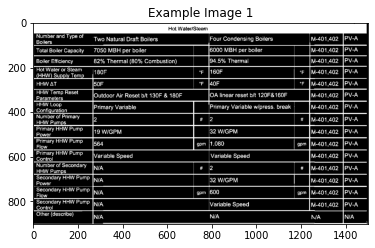

In [20]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image1=cv2.imread('pictures/captureimage.png')
image1=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
thresh1,img_bin1 = cv2.threshold(image1,127,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
img_bin1 = 255-img_bin1
plotting = plt.imshow(img_bin1,cmap='gray')
plt.title("Example Image 1")
plt.show()


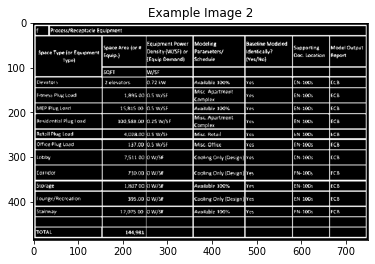

In [21]:
image2=cv2.imread('pictures/test_text2.png')
image2=cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
thresh2,img_bin2 = cv2.threshold(image2,127,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
img_bin2 = 255-img_bin2
plotting = plt.imshow(img_bin2,cmap='gray')
plt.title("Example Image 2")
plt.show()

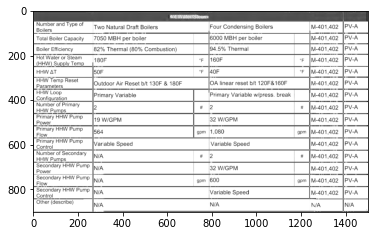

In [22]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
vertical_kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, np.array(image1).shape[1]//150))
eroded_image1 = cv2.erode(image1, vertical_kernel1, iterations=5)
vertical_lines1 = cv2.dilate(eroded_image1, vertical_kernel1, iterations=5)
hor_kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (np.array(image1).shape[1]//150, 1))
image_1 = cv2.erode(img_bin1, hor_kernel1, iterations=5)
horizontal_lines1 = cv2.dilate(image_1, hor_kernel1, iterations=5)
vertical_horizontal_lines1 = cv2.addWeighted(vertical_lines1, 0.5, horizontal_lines1, 0.5, 0.0)
vertical_horizontal_lines1 = cv2.erode(~vertical_horizontal_lines1, kernel, iterations=3)
thresh1, vertical_horizontal_lines1 = cv2.threshold(vertical_horizontal_lines1,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
b_image1 = cv2.bitwise_not(cv2.bitwise_xor(image1,vertical_horizontal_lines1))
plotting = plt.imshow(b_image1,cmap='gray')
plt.show()

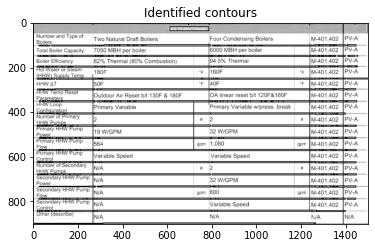

In [23]:
contours1, hierarchy1 = cv2.findContours(vertical_horizontal_lines1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
boundingBoxes1 = [cv2.boundingRect(c) for c in contours1]
(contours1, boundingBoxes1) = zip(*sorted(zip(contours1, boundingBoxes1),
key=lambda x:x[1][1]))
boxes1 = []
for contour in contours1:
    x, y, w, h = cv2.boundingRect(contour)
    if (w<1000 and h<500):
        image = cv2.rectangle(image1,(x,y),(x+w,y+h),(0,255,0),2)
        boxes1.append([x,y,w,h])
plotting = plt.imshow(image,cmap='gray')
plt.title("Identified contours")
plt.show()

In [24]:
rows1=[]
columns1=[]
heights1= [boundingBoxes1[i][3] for i in range(len(boundingBoxes1))]
mean1= np.mean(heights1)
print(mean1)
columns1.append(boxes1[0])
previous1=boxes1[0]
for i in range(1,len(boxes1)):
    if(boxes1[i][1]<=previous1[1]+mean1/2):
        columns1.append(boxes1[i])
        previous1=boxes1[i]
        if(i==len(boxes1)-1):
            rows1.append(columns1)
    else:
        rows1.append(columns1)
        columns1=[]
        previous1 = boxes1[i]
        columns1.append(boxes1[i])
print("Rows")
for row in rows1:
    print(row)
total_cells1=0
for i in range(len(rows1)):
    if len(rows1[i]) > total_cells1:
        total_cells1 = len(rows1[i])
    print(total_cells1)
center1 = [int(rows1[i][j][0]+rows1[i][j][2]/2) for j in range(len(rows1[i])) if rows1[0]]
print(center1)
center1=np.array(center1)
center1.sort()
print(center1)

7.288359788359788
Rows
[[1501, 0, 1, 45], [1444, 0, 3, 4], [1390, 0, 1, 45], [1240, 0, 1, 9], [789, 0, 1, 7], [696, 0, 2, 7], [268, 0, 1, 6]]
[[613, 16, 175, 18]]
[[1411, 96, 37, 7], [1407, 96, 3, 7], [1366, 96, 34, 7], [1358, 96, 3, 7], [1352, 96, 6, 7], [1346, 96, 5, 7], [1344, 96, 3, 7], [1336, 96, 8, 7], [1330, 96, 4, 7], [1313, 96, 18, 7], [1302, 96, 12, 7], [1295, 96, 7, 7], [1286, 96, 8, 7], [1280, 96, 4, 7], [1264, 96, 17, 7], [505, 96, 291, 7], [494, 96, 8, 7], [489, 96, 3, 7], [470, 96, 18, 7], [462, 96, 8, 7], [456, 96, 7, 7], [449, 96, 4, 7], [434, 96, 14, 7], [426, 96, 8, 7], [424, 96, 3, 7], [389, 96, 33, 7], [385, 96, 5, 7], [379, 96, 7, 7], [372, 96, 7, 7], [366, 96, 5, 7], [354, 96, 11, 7], [351, 96, 3, 7], [343, 96, 9, 7], [318, 96, 22, 7], [1250, 98, 15, 5], [1026, 98, 224, 5], [1024, 98, 3, 5], [1017, 98, 6, 5], [1011, 98, 6, 5], [1002, 98, 8, 5], [986, 98, 17, 5], [982, 98, 3, 5], [977, 98, 5, 5], [972, 98, 5, 5], [952, 98, 21, 5], [944, 98, 9, 5], [939, 98, 6, 5],

In [25]:
boxes_list1 = []
for i in range(len(rows1)):
    l=[]
    for k in range(total_cells1):
        l.append([])
    for j in range(len(rows1[i])):
        diff = abs(center1-(rows1[i][j][0]+rows1[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        l[indexing].append(rows1[i][j])
    boxes_list1.append(l)
for box in boxes_list1:
    print(box)

[[], [[268, 0, 1, 6]], [], [], [], [[789, 0, 1, 7], [696, 0, 2, 7]], [[1240, 0, 1, 9]], [[1501, 0, 1, 45], [1444, 0, 3, 4], [1390, 0, 1, 45]], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
[[], [], [], [], [], [[613, 16, 175, 18]], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
[[[83, 98, 197, 5], [63, 98, 13, 5], [56, 98, 8, 5], [45, 98, 12, 5], [39, 98, 7, 5], [33, 98, 7, 5], [26, 98, 7, 5]], [[280, 98, 10, 5]], [[290, 98, 8, 5]], [[297, 98, 7, 5]], [[494, 96, 8, 7], [489, 96, 3, 7], [470, 96, 18, 7], 

In [26]:
dataframe_final1=[]
for i in range(len(boxes_list1)):
    for j in range(len(boxes_list1[i])):
     s=''
     if(len(boxes_list1[i][j])==0):
       dataframe_final1.append(' ')
     else:
        for k in range(len(boxes_list1[i][j])):
            y,x,w,h = boxes_list1[i][j][k][0],boxes_list1[i][j][k][1], boxes_list1[i][j][k][2],boxes_list1[i][j][k][3]
            roi = image1[x:x+h, y:y+w]
            kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
            border = cv2.copyMakeBorder(roi,2,2,2,2, cv2.BORDER_CONSTANT,value=[255,255])
            resizing = cv2.resize(border, None, fx=1.1, fy=1.1, interpolation=cv2.INTER_CUBIC)
            dilation = cv2.dilate(resizing, kernel,iterations=1)
            erosion = cv2.erode(dilation, kernel,iterations=2)
            out = pytesseract.image_to_string(erosion)
            if(len(out)==0):
                out = pytesseract.image_to_string(erosion)
            s = s +" "+ out
        dataframe_final1.append(s)
print(dataframe_final1)

[' ', ' ', ' ', ' ', ' ', '  ', ' ', '   ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '       ', ' ', ' ', ' ', '                    ', '                             ', '               ', '  ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '

In [27]:
arr1 = np.array(dataframe_final1)
arr1
import pandas as pd
dataframe1 = pd.DataFrame(arr1.reshape(len(rows1), total_cells1))
data1 = dataframe1.style.set_properties(align="left")
print(data1)
print(dataframe1)
d=[]
for i in range(0,len(rows1)):
    for j in range(0,total_cells1):
        print(dataframe1[i][j],end=" ")
print()
dataframe1.to_csv("output1.csv")
df1 = pd.read_csv("output1.csv")
pd.options.display.max_columns = None
display(df1)

                             0       1   2   3                       4   \
0                                                                         
1                                                                         
2                                                                         
3                                                                         
4                                                                         
5                                                                         
6                                                                         
7                                                                         
8                                                                         
9                                                                         
10                                                                        
11                                                                        
12                       

KeyError: 18

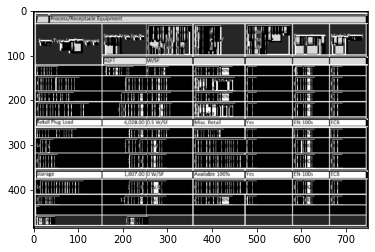

In [35]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
vertical_kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, np.array(image2).shape[1]//150))
eroded_image2 = cv2.erode(image2, vertical_kernel2, iterations=5)
vertical_lines2 = cv2.dilate(eroded_image2, vertical_kernel2, iterations=5)
hor_kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (np.array(image2).shape[1]//150, 1))
image_2 = cv2.erode(img_bin2, hor_kernel2, iterations=5)
horizontal_lines2 = cv2.dilate(image_2, hor_kernel2, iterations=5)
vertical_horizontal_lines2 = cv2.addWeighted(vertical_lines2, 0.5, horizontal_lines2, 0.5, 0.0)
vertical_horizontal_lines2 = cv2.erode(~vertical_horizontal_lines2, kernel, iterations=3)
thresh2, vertical_horizontal_lines2 = cv2.threshold(vertical_horizontal_lines2,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
b_image2 = cv2.bitwise_not(cv2.bitwise_xor(image2,vertical_horizontal_lines2))
plotting = plt.imshow(b_image2,cmap='gray')
plt.show()

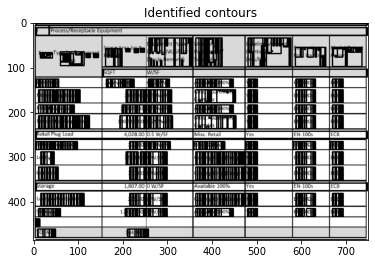

In [36]:
contours2, hierarchy2 = cv2.findContours(vertical_horizontal_lines2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
boundingBoxes2 = [cv2.boundingRect(c) for c in contours2]
(contours2, boundingBoxes2) = zip(*sorted(zip(contours2, boundingBoxes2),
key=lambda x:x[1][1]))
boxes2 = []
for contour in contours2:
    x, y, w, h = cv2.boundingRect(contour)
    if (w<1000 and h<500):
        image = cv2.rectangle(image2,(x,y),(x+w,y+h),(0,255,0),2)
        boxes2.append([x,y,w,h])
plotting = plt.imshow(image,cmap='gray')
plt.title("Identified contours")
plt.show()

In [37]:
rows2=[]
columns2=[]
heights2= [boundingBoxes2[i][3] for i in range(len(boundingBoxes2))]
mean2= np.mean(heights2)
print(mean2)
columns2.append(boxes2[0])
previous2=boxes2[0]
for i in range(1,len(boxes2)):
    if(boxes2[i][1]<=previous2[1]+mean2/2):
        columns2.append(boxes2[i])
        previous2=boxes2[i]
        if(i==len(boxes2)-1):
            rows2.append(columns2)
    else:
        rows2.append(columns2)
        columns2=[]
        previous2 = boxes2[i]
        columns2.append(boxes2[i])
print("Rows")
for row in rows2:
    print(row)
total_cells2=0
for i in range(len(rows2)):
    if len(rows2[i]) > total_cells2:
        total_cells2 = len(rows2[i])
    print(total_cells2)
center2 = [int(rows2[i][j][0]+rows2[i][j][2]/2) for j in range(len(rows2[i])) if rows2[0]]
print(center2)
center2=np.array(center2)
center2.sort()
print(center2)

24.346153846153847
Rows
[[7, 0, 743, 4], [7, 10, 743, 17]]
[[481, 33, 96, 64], [364, 33, 59, 64], [259, 33, 97, 64], [394, 36, 9, 52]]
[[670, 54, 66, 43], [587, 54, 68, 43], [240, 56, 9, 9], [226, 57, 10, 9], [207, 57, 10, 7], [162, 57, 37, 40], [61, 64, 53, 31], [16, 66, 27, 12], [135, 68, 11, 9], [118, 68, 10, 9]]
[[157, 103, 593, 17]]
[[670, 125, 24, 19], [590, 125, 42, 19], [481, 125, 21, 19], [364, 125, 84, 19], [258, 125, 47, 19], [165, 125, 61, 19], [7, 125, 50, 19]]
[[670, 149, 24, 29], [588, 149, 44, 29], [481, 149, 21, 29], [364, 149, 89, 29], [209, 149, 101, 29], [53, 149, 52, 29], [12, 149, 37, 29]]
[[670, 183, 24, 19], [588, 183, 44, 19], [481, 183, 21, 19], [364, 183, 84, 19], [199, 183, 111, 19], [12, 183, 80, 19]]
[[670, 207, 24, 29], [588, 207, 44, 29], [481, 207, 21, 29], [364, 207, 90, 29], [194, 207, 118, 29], [12, 207, 114, 29]]
[[7, 242, 743, 16]]
[[666, 265, 28, 18], [583, 265, 49, 18], [476, 265, 26, 18], [360, 265, 69, 18], [217, 265, 90, 18], [7, 265, 92, 18]]

In [38]:
boxes_list2 = []
for i in range(len(rows2)):
    l=[]
    for k in range(total_cells2):
        l.append([])
    for j in range(len(rows2[i])):
        diff = abs(center2-(rows2[i][j][0]+rows2[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        l[indexing].append(rows2[i][j])
    boxes_list2.append(l)
for box in boxes_list2:
    print(box)

[[], [[7, 0, 743, 4], [7, 10, 743, 17]], [], [], [], [], [], [], [], []]
[[], [[481, 33, 96, 64], [364, 33, 59, 64], [259, 33, 97, 64], [394, 36, 9, 52]], [], [], [], [], [], [], [], []]
[[[61, 64, 53, 31], [16, 66, 27, 12], [118, 68, 10, 9]], [[670, 54, 66, 43], [587, 54, 68, 43], [240, 56, 9, 9], [226, 57, 10, 9], [207, 57, 10, 7], [162, 57, 37, 40], [135, 68, 11, 9]], [], [], [], [], [], [], [], []]
[[], [[157, 103, 593, 17]], [], [], [], [], [], [], [], []]
[[[7, 125, 50, 19]], [[670, 125, 24, 19], [590, 125, 42, 19], [481, 125, 21, 19], [364, 125, 84, 19], [258, 125, 47, 19], [165, 125, 61, 19]], [], [], [], [], [], [], [], []]
[[[53, 149, 52, 29], [12, 149, 37, 29]], [[670, 149, 24, 29], [588, 149, 44, 29], [481, 149, 21, 29], [364, 149, 89, 29], [209, 149, 101, 29]], [], [], [], [], [], [], [], []]
[[[12, 183, 80, 19]], [[670, 183, 24, 19], [588, 183, 44, 19], [481, 183, 21, 19], [364, 183, 84, 19], [199, 183, 111, 19]], [], [], [], [], [], [], [], []]
[[[12, 207, 114, 29]], [[6

In [40]:
dataframe_final2=[]
for i in range(len(boxes_list2)):
    for j in range(len(boxes_list2[i])):
     s=''
     if(len(boxes_list2[i][j])==0):
       dataframe_final2.append(' ')
     else:
        for k in range(len(boxes_list2[i][j])):
            y,x,w,h = boxes_list2[i][j][k][0],boxes_list2[i][j][k][1], boxes_list2[i][j][k][2],boxes_list2[i][j][k][3]
            roi = image2[x:x+h, y:y+w]
            kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
            border = cv2.copyMakeBorder(roi,2,2,2,2, cv2.BORDER_CONSTANT,value=[255,255])
            resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
            dilation = cv2.dilate(resizing, kernel,iterations=1)
            erosion = cv2.erode(dilation, kernel,iterations=2)
            out = pytesseract.image_to_string(erosion)
            if(len(out)==0):
                out = pytesseract.image_to_string(erosion)
            s = s +" "+ out
        dataframe_final2.append(s)
print(dataframe_final2)

[' ', '  E PProcess7 Receptacle Equipment |\n\n', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '    | re |\n', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '   ', '       ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' OFT\n\n', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '      ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '  ', '     ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '     ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '     ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' etail Plug Loa: 4,028.00 |0.5 W/SF Retail Yes EN-100s ECB\n\n', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '     ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '     ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '    ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' 1,807.00 |O W/SF le 100% Yes EN-100s ECB\n\n', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '    ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '      ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' 

In [41]:
arr2 = np.array(dataframe_final2)
arr2
import pandas as pd
dataframe2 = pd.DataFrame(arr2.reshape(len(rows2), total_cells2))
data2 = dataframe2.style.set_properties(align="left")
print(data2)
print(dataframe2)
d=[]
for i in range(0,len(rows2)):
    for j in range(0,total_cells2):
        print(dataframe2[i][j],end=" ")
print()
dataframe2.to_csv("output2.csv")
df2 = pd.read_csv("output2.csv")
pd.options.display.max_columns = None
display(df2)

          0                                                  1  2  3  4  5  6  \
0                       E PProcess7 Receptacle Equipment |\n\n                  
1                                                     | re |\n                  
2                                                                               
3                                                      OFT\n\n                  
4                                                                               
5                                                                               
6                                                                               
7                                                                               
8             etail Plug Loa: 4,028.00 |0.5 W/SF Retail Yes...                  
9                                                                               
10                                                                              
11                          

KeyError: 10